# Question

Is there an easy way to merge circuits, so take 3 pregenerated circuits and merge them to one big one?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymatching
import stim

circ_path = "circuits/"
plot_path = "plots/"

In [2]:
from steane_code_functions import create_surface_steane_ciruit, add_noise
from support_functions import plot_factory_set, count_logical_errors

# Plan to generalize for higher distance codes 

does not work for even number distances! 
    + this is due to an error in my create_stabilizers function, might correct it later 

add basic errors on general qubit data qubits

# Questions 

for general state I should add the second set of stabilizers to the general qubit? 
 -> just a question if I should enable general encoding but there should not be any need for it ...


is this already circuit-level noise? (errors after each gate?)
+ code-capacity model  (just physical dataqubits fail?)
+ phenomenological noise model (stabilizer can fail with fixed prob?)

What should i call this noise model?


# Not yet implemented  (needed?)

idle time errors

layout for arbitrary code size 


In [3]:
# Testing the Construct steane_cirucuit function
test_circ = create_surface_steane_ciruit(
    distance=4,
    detectors=True, 
)

if 1:
    diagram = test_circ.diagram("timeline-svg")  
    with open(circ_path + 'new_test_circ.svg', 'w') as f:
        f.write(str(diagram))
    

In [4]:
def rec_factory(distance):
    def factory_basic(noise, name=False):
        if name:
            return str(distance) 
        else:
            circuit = create_surface_steane_ciruit(
                distance=distance
            )
            noise_model = {
                    "two_qubit_gate": {
                        "error": "DEPOLARIZE2",
                        "noise": noise,
                    },
                } 
            circuit = add_noise(
                circuit,
                noise_model = noise_model,
                single_qubit_gate_errors=False,
                measurement_errors=False,
                initialize_errors=False, 
            )
            return circuit
    return factory_basic

In [5]:
# Testing the Construct steane_cirucuit function
test_circ = create_surface_steane_ciruit(
    distance=3,
    detectors=True, 
)

if 0:
    diagram = test_circ.diagram("timeline-svg")  
    with open(circ_path + 'test_circ.svg', 'w') as f:
        f.write(str(diagram))
    
    diagram = test_circ.diagram("timeslice-svg")  
    with open(circ_path + 'timeslice.svg', 'w') as f:
        f.write(str(diagram))

count_logical_errors(test_circ,10)


0

<Figure size 640x480 with 0 Axes>

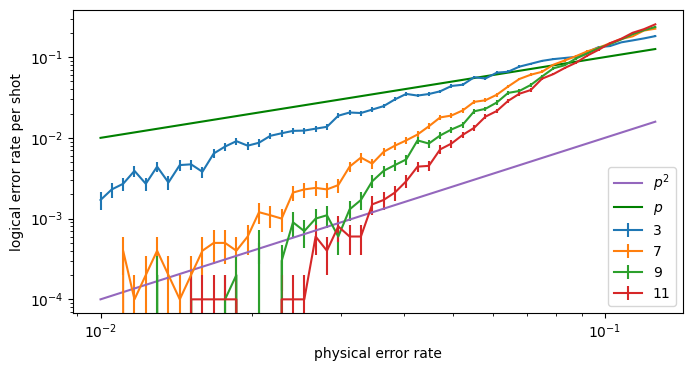

In [6]:
factory_set = [
    rec_factory(x) for x in [3,7,9,11,]
]

plot_factory_set(
    factory_set,
    num_shots=10_000,
    noise_set=np.logspace(-2,-0.9),
    filename="multiple_distances",
    reference_lines=True,
)